# TASK 4.10 - Part 2, Coding Etiquette & Excel Reporting

## This script contains the following points from Step 6- 8 in task 4.10, part 1:
### -  Importing libraries
### -  Importing Data
### -  Creating an appropriate visualization to show the distribution of profiles created in step 5.
### - Deriving new columns with loc()
### - Creating crosstab 
### -  Creating & Exporting Charts
### -  Merging datasets
### -  Exporting Data in Pickle Format

## 01. Importing libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
path = r'C:\Users\Sanja\Documents\08-2020 Instacart Basket Analysis'

In [3]:
instacart_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','instacart_all.pkl'))

In [4]:
# Check on the imported data
instacart_all.shape

(32404859, 34)

In [5]:
# Check accurate regional segmentation
instacart_all['price_range'].value_counts (dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range, dtype: int64

# Step 6.
### Note: Create an appropriate visualization to show the distribution of profiles created in step 5.

## 6.1. Age Groups, named 'age_group'

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Age'), Text(1, 0, 'Under 40'), Text(2, 0, 'Seniors')])

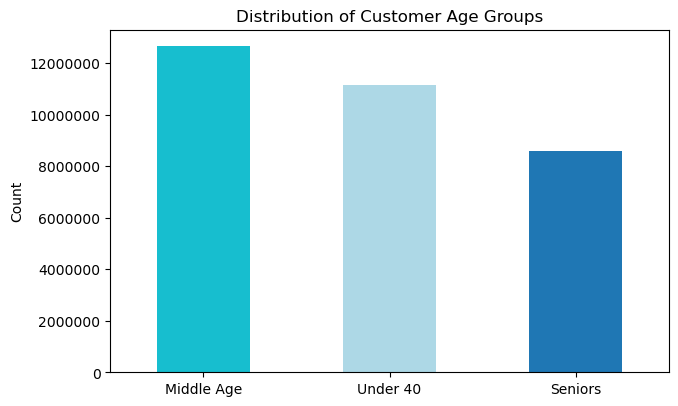

In [6]:
# Create a bar chart of the 'age_group'
bar_age_group_distribution = instacart_all['age_group'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Customer Age Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: The majority of Instacart ordered items come from customers in the middle-aged group, and the proportion of senior customers is at its lowest, or at the very least, it is the smallest among the age groups.

In [7]:
# Export the chart
bar_age_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

## 6.2. Income Groups, named 'income_group'

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Lower'), Text(2, 0, 'Higher')])

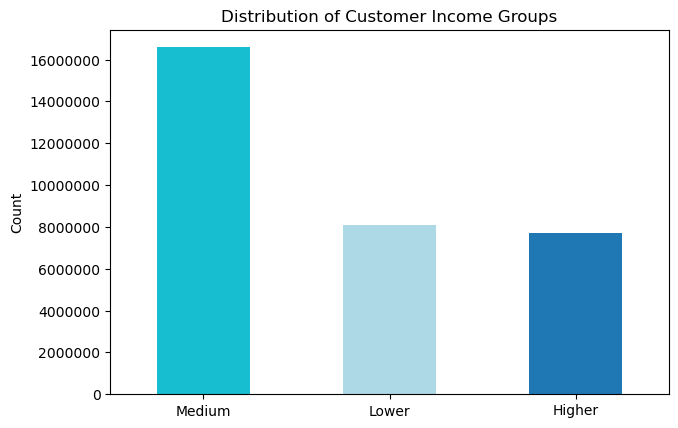

In [8]:
# Create a bar chart of the 'income_group'
bar_income_group_distribution = instacart_all['income_group'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Customer Income Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: The largest proportion of Instacart customers ordered items belongs to the medium income group, while customers in the other two income groups exhibit similar, roughly equivalent numbers.

In [9]:
# Export the chart
bar_income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

## 6.3.  'Family Status' Groups, named 'family_status_flag'

(array([0, 1, 2]),
 [Text(0, 0, 'Family'),
  Text(1, 0, 'Single adult'),
  Text(2, 0, 'Young parent')])

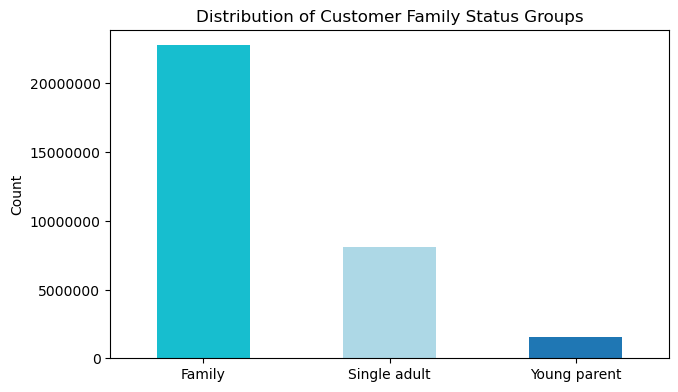

In [10]:
# Create a bar chart of the 'family_status_flag'
bar_family_status_group_distribution = instacart_all['family_status_flag'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Customer Family Status Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: It appears that the majority of Instacart orders are placed by customers with families, while the proportion of orders from young parents is comparatively smaller, if not minimal.

In [11]:
# Export the chart
bar_family_status_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_group.png'))

## 6.4. Distribution of the orders by department 

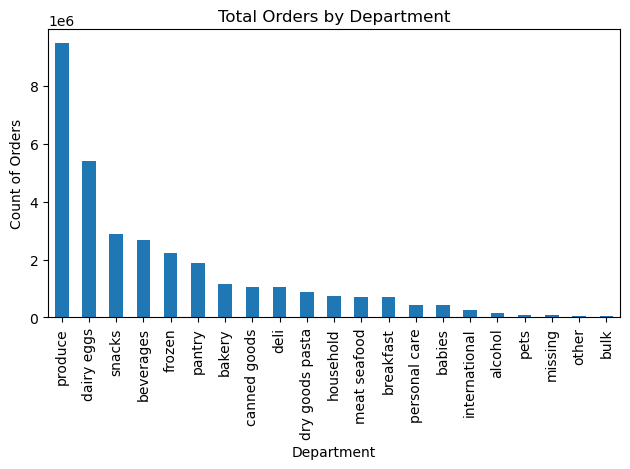

In [12]:
# Create bar chart of department orders

department_bar = instacart_all['department'].value_counts().plot.bar(color='tab:blue')
plt.title('Total Orders by Department')
plt.tight_layout()
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.tight_layout()  # Automatically adjust subplot parameters

### Observation: The top five departments on Instacart are Produce, Dairy & Eggs, Snacks, Beverages, and Frozen. Among these, Produce and Dairy & Eggs stand out with significantly higher order volumes. Concentrating efforts on these departments could boost sales. Additionally, analyzing customer demographics specific to each department could aid in targeted advertising strategies to further enhance sales.

In [13]:
# Export the chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_department_bar.png'))

## 6.5. Distribution of the Goods Groups from Departments 

(array([0, 1, 2]),
 [Text(0, 0, 'Grocery Essentials'),
  Text(1, 0, 'Non-Grocery Items'),
  Text(2, 0, 'Not Specified')])

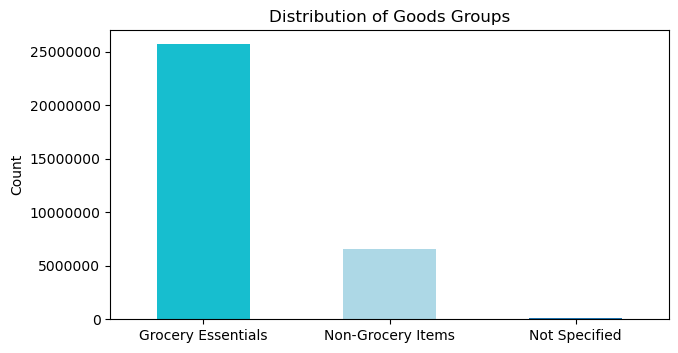

In [14]:
# Create a bar chart of the 'goods_type'
goods_group_distribution = instacart_all['goods_group'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of Goods Groups",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: The majority of items ordered through Instacart belong to the "Grocery Essentials" group.

In [15]:
# Export the chart
goods_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_group_bar.png'))

# Step 7.
### Note: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

## 7.1. Age Groups

In [16]:
age_group_agg = instacart_all.groupby('age_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [17]:
age_group_agg

days_since_last_order                  prices                
                             min   max       mean    min   max      mean
age_group                                                               
Middle Age                   0.0  30.0  11.117805    1.0  25.0  7.791837
Seniors                      0.0  30.0  11.078641    1.0  25.0  7.796546
Under 40                     0.0  30.0  11.108046    1.0  25.0  7.785774

### Observation: There aren't any notable variations in the spending patterns and  how often customers from different age groups place orders.  Since all groups exhibit the same minimum and maximum values, additional analysis is required to draw meaningful conclusions about the data.

## 7.1.1 Usage Frequency based on Age Groups

In [18]:
# Create crosstab of 'age_group' data with 'frequency_flag'

crosstab_age_freq=pd.crosstab(instacart_all['frequency_flag'],instacart_all['age_group'],dropna=False)

In [19]:
crosstab_age_freq

age_group,Middle Age,Seniors,Under 40
frequency_flag,,,
Frequent customer,8410586,5728812,7420455
Non-frequent customer,1438887,951609,1245941
Regular customer,2816105,1894663,2497796


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

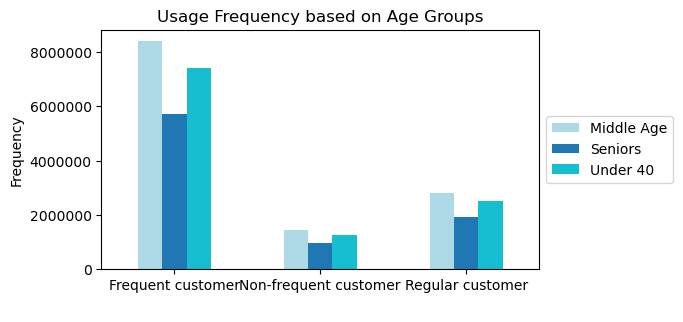

In [20]:
# Create a bar chart of the above crosstab_age_freq 

bar_crosstab_age_freq=crosstab_age_freq.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Usage Frequency based on Age Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: There aren't any notable variations in how often customers from different age groups place orders.

In [21]:
# Export the chart
bar_crosstab_age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_freq.png'))

## 7.1.2. Expenditure based on Age Groups

In [22]:
# Create crosstab of 'age_group' data with 'spending_flag'
crosstab_age_expenditure=pd.crosstab(instacart_all['spending_flag'],instacart_all['age_group'],dropna=False)

In [23]:
crosstab_age_expenditure

age_group,Middle Age,Seniors,Under 40
spending_flag,,,
High spender,259027,163994,211224
Low spender,12406556,8411090,10952968


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

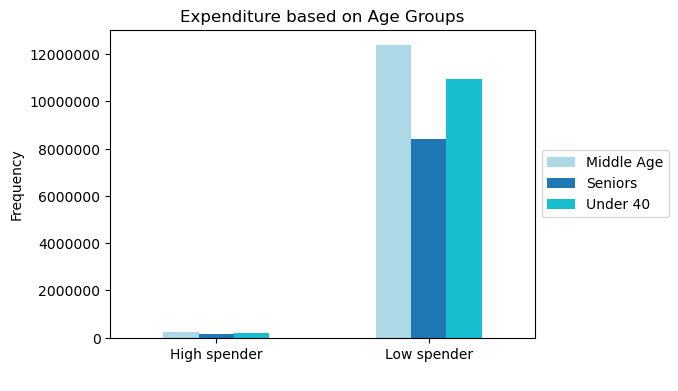

In [24]:
# Create a bar chart of the above crosstab_age_expenditure 

bar_crosstab_age_expend=crosstab_age_expenditure.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Expenditure based on Age Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: There aren't any significant differences in the spending patterns of customers across different age groups. The middle-aged group represents the largest portion of Instacart customers, while senior customers constitute the smallest portion, even when considering whether they are high spenders or low spenders.

In [25]:
# Export the chart
bar_crosstab_age_expend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_expenditure.png'))

## 7.1.3 Ordering Habits of Different Age Groups Considering the Products Customers are Ordering

In [26]:
# Filter out rows with 'Not Specified' in the 'goods_group' column
filtered_data = instacart_all[instacart_all['goods_group'] != 'Not Specified']

In [27]:
filtered_data['goods_group']

0           Grocery Essentials
1           Grocery Essentials
2           Grocery Essentials
3           Grocery Essentials
4           Grocery Essentials
                   ...        
32370281     Non-Grocery Items
32370282     Non-Grocery Items
32370283     Non-Grocery Items
32370284     Non-Grocery Items
32370285     Non-Grocery Items
Name: goods_group, Length: 32301141, dtype: object

In [28]:
# Create the cross-tabulation without the 'Not Specified' group
crosstab_age_products = pd.crosstab(filtered_data['goods_group'], filtered_data['age_group'], dropna=False)

In [29]:
crosstab_age_products

age_group,Middle Age,Seniors,Under 40
goods_group,,,
Grocery Essentials,10054849,6815493,8865909
Non-Grocery Items,2570418,1732255,2262217


(array([0, 1]),
 [Text(0, 0, 'Grocery Essentials'), Text(1, 0, 'Non-Grocery Items')])

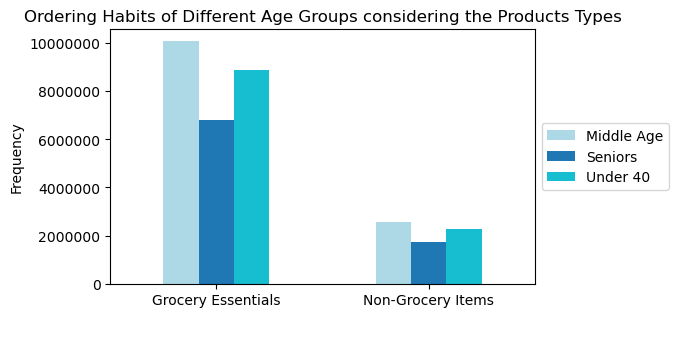

In [30]:
# Create a bar chart of the above crosstab_age_products 
bar_crosstab_age_products=crosstab_age_products.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Ordering Habits of Different Age Groups considering the Products Types", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation:  There isn't a significant difference in the ordering habits of customers from various age groups when it comes to the types of products (grocery or non_grocery) they are ordering through Instacart.

In [31]:
# Export the chart
bar_crosstab_age_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_types_products.png'))

## 7.2. Income Groups

In [32]:
income_group_agg = instacart_all.groupby('income_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [33]:
income_group_agg

days_since_last_order                  prices                
                               min   max       mean    min   max      mean
income_group                                                              
Higher                         0.0  30.0  11.012961    1.0  25.0  7.955670
Lower                          0.0  30.0  11.322348    1.0  25.0  7.284120
Medium                         0.0  30.0  11.040467    1.0  25.0  7.961977

###  Observation: There aren't any notable variations in the spending patterns and  how often customers from different income groups place orders. Since all groups exhibit the same minimum and maximum values, additional analysis is required to draw meaningful conclusions about the data.

## 7.2.1 Usage Frequency based on Income Groups

In [34]:
# Create crosstab of 'income_group' data with 'frequency_flag'

crosstab_income_freq=pd.crosstab(instacart_all['frequency_flag'],instacart_all['income_group'],dropna=False)

In [35]:
crosstab_income_freq

income_group,Higher,Lower,Medium
frequency_flag,,,
Frequent customer,5179986,5274329,11105538
Non-frequent customer,824653,1013969,1797815
Regular customer,1708884,1812501,3687179


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

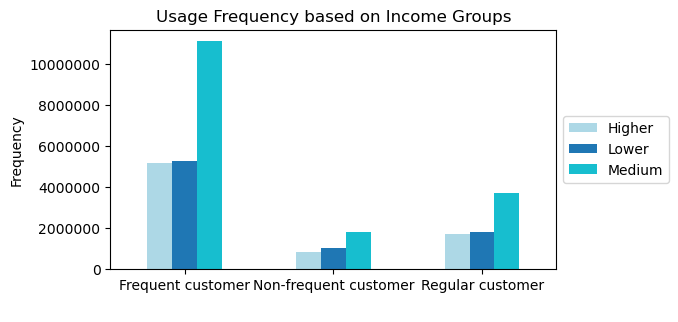

In [36]:
# Create a bar chart of the above crosstab_income_freq

bar_crosstab_income_freq=crosstab_income_freq.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Usage Frequency based on Income Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: There aren't any notable variations in how often customers from different income groups place orders. 

In [37]:
# Export the chart
bar_crosstab_income_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_freq.png'))

## 7.2.2. Expenditure based on Income Groups

In [38]:
# Create crosstab of 'income_group' data with 'spending_flag'
crosstab_income_expenditure=pd.crosstab(instacart_all['spending_flag'],instacart_all['income_group'],dropna=False)

In [39]:
crosstab_income_expenditure

income_group,Higher,Lower,Medium
spending_flag,,,
High spender,455568,23867,154810
Low spender,7257960,8076932,16435722


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

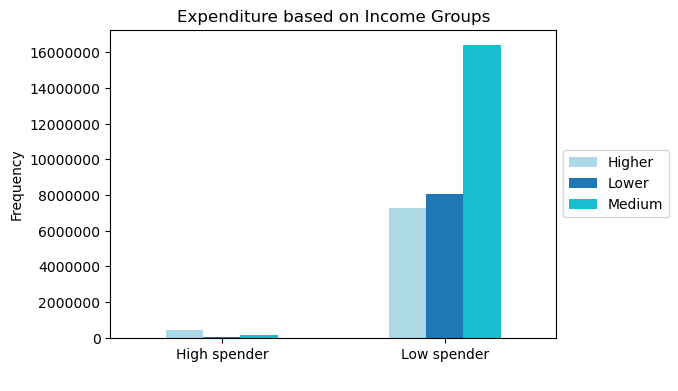

In [40]:
# Create a bar chart of the above crosstab_age_expenditure 

bar_crosstab_income_expend=crosstab_income_expenditure.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Expenditure based on Income Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: Significant variations in spending patterns emerge among customers from different income groups. The "Higher" income group displays a higher proportion of "High spenders," while the "Lower" income group primarily consists of "Low spenders," indicating a clear correlation between income levels and spending behavior when it comes to their orders.

In [41]:
# Export the chart
bar_crosstab_income_expend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_expenditure.png'))

## 7.2.3 Ordering Habits of Different Income Groups Considering the Products Customers are Ordering

In [42]:
# Create the cross-tabulation without the 'Not Specified' group
crosstab_income_products = pd.crosstab(filtered_data['goods_group'], filtered_data['income_group'], dropna=False)

In [43]:
crosstab_income_products

income_group,Higher,Lower,Medium
goods_group,,,
Grocery Essentials,6082613,6530548,13123090
Non-Grocery Items,1606807,1543492,3414591


(array([0, 1]),
 [Text(0, 0, 'Grocery Essentials'), Text(1, 0, 'Non-Grocery Items')])

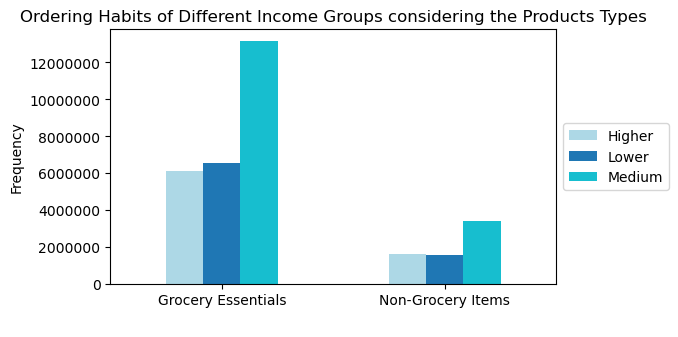

In [44]:
# Create a bar chart of the above crosstab_income_products 
bar_crosstab_income_products=crosstab_income_products.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Ordering Habits of Different Income Groups considering the Products Types", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation:  There isn't a significant difference in the ordering habits of customers from various income groups when it comes to the types of products (grocery or non_grocery) they are ordering through Instacart.

In [45]:
# Export the chart
bar_crosstab_income_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_types_products.png'))

## 7.3.  'Family Status' Groups, named 'family_status_flag'

In [46]:
family_status_group_agg = instacart_all.groupby('family_status_flag',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [47]:
family_status_group_agg

days_since_last_order                  prices        \
                                     min   max       mean    min   max   
family_status_flag                                                       
Family                               0.0  30.0  11.116175    1.0  25.0   
Single adult                         0.0  30.0  11.080805    1.0  25.0   
Young parent                         0.0  30.0  11.048170    1.0  25.0   

                              
                        mean  
family_status_flag            
Family              7.790695  
Single adult        7.789975  
Young parent        7.800712

### Observation: There aren't any notable variations in the spending patterns and  how often customers from different age groups place orders.  Since all groups exhibit the same minimum and maximum values, additional analysis is required to draw meaningful conclusions about the data.

## 7.3.1 Usage Frequency based on Family Status Groups

In [48]:
# Create crosstab of 'family_status_flag' data with 'frequency_flag'

crosstab_family_status_freq=pd.crosstab(instacart_all['frequency_flag'],instacart_all['family_status_flag'],dropna=False)

In [49]:
crosstab_family_status_freq

family_status_flag,Family,Single adult,Young parent
frequency_flag,,,
Frequent customer,15137381,5375372,1047100
Non-frequent customer,2564637,896781,175019
Regular customer,5054730,1825350,328484


(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Non-frequent customer'),
  Text(2, 0, 'Regular customer')])

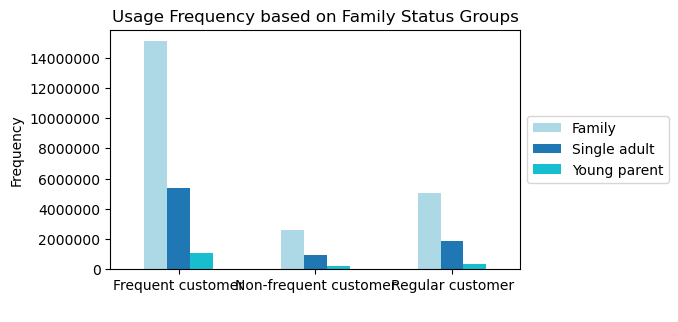

In [50]:
# Create a bar chart of the above crosstab_family_status_freq

bar_crosstab_family_status_freq=crosstab_family_status_freq.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Usage Frequency based on Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: The ordering pattern among family status groups remains consistent regardless of how frequently customers place orders. Specifically, most Instacart orders originate from customers with families, while orders from young parents remain relatively low, regardless of order frequency.

In [51]:
# Export the chart
bar_crosstab_family_status_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_freq.png'))

## 7.3.2. Expenditure based on Family Status Groups

In [52]:
# Create crosstab of 'family_status_flag' data with 'spending_flag'
crosstab_family_status_expenditure=pd.crosstab(instacart_all['spending_flag'],instacart_all['family_status_flag'],dropna=False)

In [53]:
crosstab_family_status_expenditure

family_status_flag,Family,Single adult,Young parent
spending_flag,,,
High spender,451324,153532,29389
Low spender,22305429,7943971,1521214


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

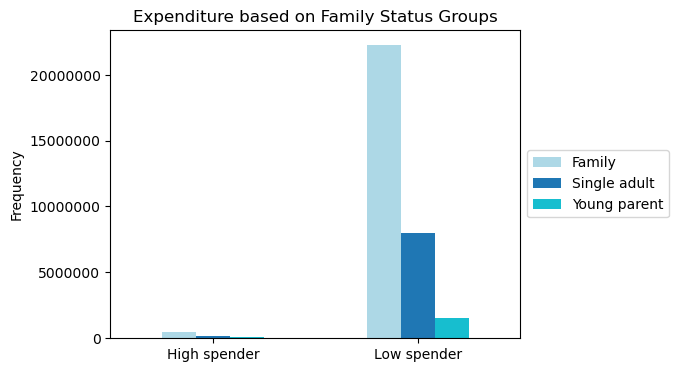

In [54]:
# Create a bar chart of the above crosstab_age_expenditure 
bar_crosstab_family_status_expend=crosstab_family_status_expenditure.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Expenditure based on Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: There aren't any significant differences in the spending patterns of customers across different family status groups . The majority of Instacart orders are placed by customers with families, while the proportion of orders from young parents is comparatively small, even when considering whether they are high spenders or low spenders.

In [55]:
# Export the chart
bar_crosstab_family_status_expend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_expenditure.png'))

## 7.3.3 Ordering Habits of Different Family Status Groups Considering the Products Customers are Ordering

In [56]:
# Create the cross-tabulation without the 'Not Specified' group
crosstab_family_status_products = pd.crosstab(filtered_data['goods_group'], filtered_data['family_status_flag'], dropna=False)

In [57]:
crosstab_family_status_products

family_status_flag,Family,Single adult,Young parent
goods_group,,,
Grocery Essentials,18070728,6438369,1227154
Non-Grocery Items,4612918,1633768,318204


(array([0, 1]),
 [Text(0, 0, 'Grocery Essentials'), Text(1, 0, 'Non-Grocery Items')])

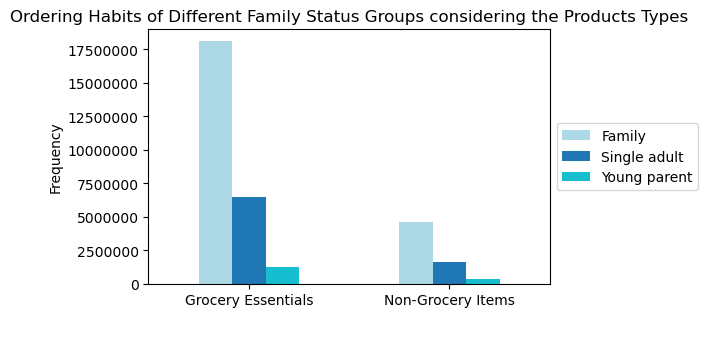

In [58]:
# Create a bar chart of the above crosstab_family_status_products 
bar_crosstab_family_status_products=crosstab_family_status_products.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Ordering Habits of Different Family Status Groups considering the Products Types", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation:  There isn't a significant difference in the ordering habits of customers from various income groups when it comes to the types of products (grocery or non_grocery) they are ordering through Instacart.

In [59]:
# Export the chart
bar_crosstab_family_status_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_types_products.png'))

# Step 8.
### Note: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## 8.1. Age Groups

### 8.1.1 Age Groups Behaviors across Regions

In [60]:
# Create crosstab of 'age_group' data with 'region'
crosstab_age_region=pd.crosstab(instacart_all['region'],instacart_all['age_group'],dropna=False)

In [61]:
crosstab_age_region

age_group,Middle Age,Seniors,Under 40
region,,,
Midwest,3005352,1990844,2601129
Northeast,2209479,1553903,1959354
South,4179885,2836257,3775743
West,3270867,2194080,2827966


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

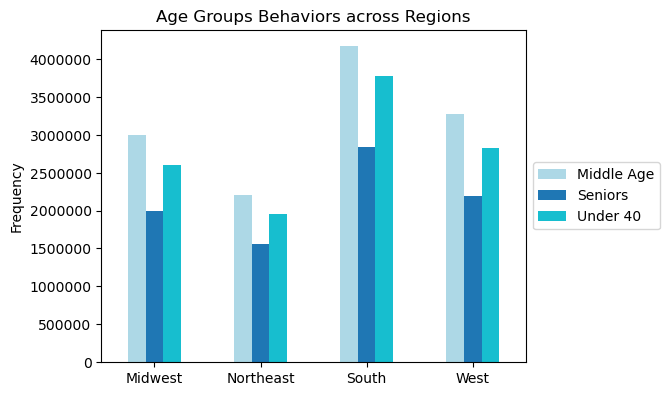

In [62]:
# Create a bar chart of the above crosstab_age_region 
bar_crosstab_age_region=crosstab_age_region.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Age Groups Behaviors across Regions", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: Age Groups' behavioral patterns do not vary significantly across different regions.

In [63]:
# Export the chart
bar_crosstab_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_region.png'))

### 8.1.2 Age Groups Behaviors across Departments

In [64]:
# Create crosstab of 'age_group' data with 'department'
crosstab_age_department=pd.crosstab(instacart_all['department'],instacart_all['age_group'],dropna=False)

In [65]:
crosstab_age_department

age_group,Middle Age,Seniors,Under 40
department,,,
alcohol,59771,39036,54889
babies,167984,109445,146373
bakery,458686,309522,404220
beverages,1059131,714832,914160
breakfast,275947,183844,243242
bulk,13329,9242,12002
canned goods,416382,282438,369238
dairy eggs,2102456,1426213,1870078
deli,411631,277618,362000


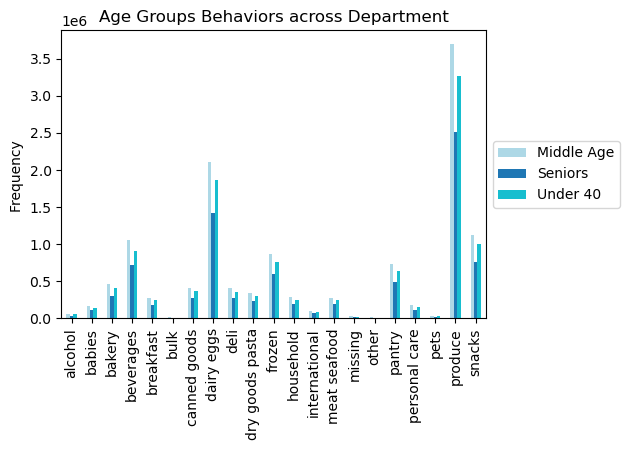

In [66]:
# Create a bar chart of the above crosstab_age_department
bar_crosstab_age_department=crosstab_age_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.ylabel("Frequency ", fontsize=10)
plt.xlabel(" ",fontsize=10)
plt.title("Age Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

### Observation: Age Groups' behavioral patterns do not vary significantly across different departments.

### Based on the provided data, several patterns and insights can be recognized:
#### The "produce" department is the most popular across all age groups, with significantly higher purchase quantities compared to other departments. This suggests that fresh produce is a staple for customers of all age groups.
#### Purchase quantities vary significantly between departments, with some departments like "alcohol" and "babies" having relatively lower purchases across all age groups.

In [67]:
# Export the chart
bar_crosstab_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_department.png'))

## 8.2. Income Groups

### 8.2.1 Income Groups Behaviors across Regions

In [68]:
# Create crosstab of 'income_group' data with 'region'
crosstab_income_region=pd.crosstab(instacart_all['region'],instacart_all['income_group'],dropna=False)

In [69]:
crosstab_income_region

income_group,Higher,Lower,Medium
region,,,
Midwest,1835777,1876034,3885514
Northeast,1367168,1429095,2926473
South,2546153,2716149,5529583
West,1964430,2079521,4248962


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

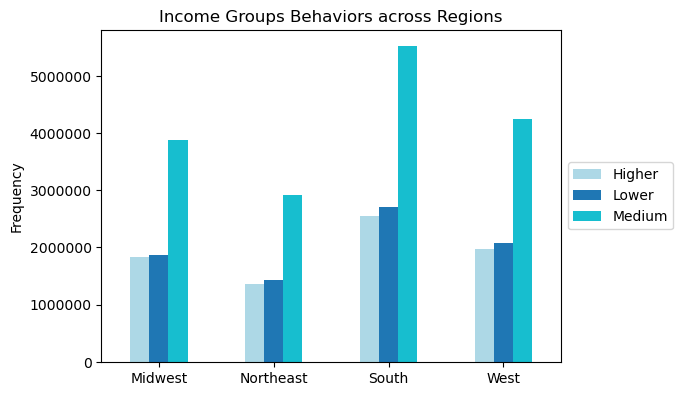

In [70]:
# Create a bar chart of the above crosstab_income_region 
bar_crosstab_income_region=crosstab_income_region.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Income Groups Behaviors across Regions", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: Income Groups' behavioral patterns do not vary significantly across different regions.

In [71]:
# Export the chart
bar_crosstab_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_region.png'))

### 8.2.2 Income Groups Behaviors across Departments

In [72]:
# Create crosstab of 'income_group' data with 'department'
crosstab_income_department=pd.crosstab(instacart_all['department'],instacart_all['income_group'],dropna=False)

In [73]:
crosstab_income_department

income_group,Higher,Lower,Medium
department,,,
alcohol,41241,39747,72708
babies,105097,86414,232291
bakery,288754,277161,606513
beverages,613891,776511,1297721
breakfast,162424,196532,344077
bulk,7552,9688,17333
canned goods,266525,235677,565856
dairy eggs,1307701,1280316,2810730
deli,250698,259786,540765


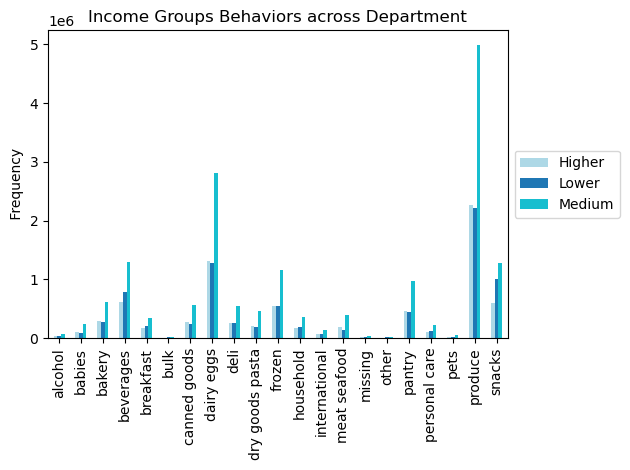

In [74]:
# Create a bar chart of the above crosstab_income_department
bar_crosstab_income_department=crosstab_income_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Income Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

### Observation:  Across different departments, there's minimal variation in behavioral patterns among income groups, with the medium income group representing the majority of Instacart customers, while the other two income groups show similar order counts.

In [75]:
# Export the chart
bar_crosstab_income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_department.png'))

## 8.3. Family Status Groups

### 8.3.1 Family Status Groups Behaviors across Regions

In [76]:
# Create crosstab of 'family_status_flag' with 'region'
crosstab_family_status_region=pd.crosstab(instacart_all['region'],instacart_all['family_status_flag'],dropna=False)

In [77]:
crosstab_family_status_region

family_status_flag,Family,Single adult,Young parent
region,,,
Midwest,5325608,1905200,366517
Northeast,4036321,1418301,268114
South,7560642,2701659,529584
West,5834182,2072343,386388


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

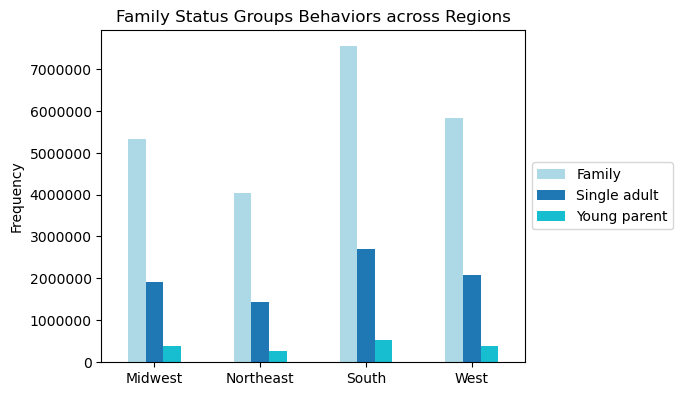

In [78]:
# Create a bar chart of the above crosstab_family_status_region 
bar_crosstab_family_status_region=crosstab_family_status_region.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel(" ", fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.title("Family Status Groups Behaviors across Regions", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: Family Status groups' behavioral patterns show consistency across regions, with the majority of Instacart orders coming from customers with families, while young parents place comparatively fewer orders.

In [79]:
# Export the chart
bar_crosstab_family_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_region.png'))

### 8.3.2 Family Status Groups Behaviors across Departments

In [80]:
# Create crosstab of 'family_status_flag' data with 'department'
crosstab_family_status_department=pd.crosstab(instacart_all['department'],instacart_all['family_status_flag'],dropna=False)

In [81]:
crosstab_family_status_department

family_status_flag,Family,Single adult,Young parent
department,,,
alcohol,105682,39118,8896
babies,297162,106494,20146
bakery,821881,294405,56142
beverages,1889052,674442,124629
breakfast,493725,174577,34731
bulk,24621,8278,1674
canned goods,752030,264838,51190
dairy eggs,3788598,1349362,260787
deli,735689,265145,50415


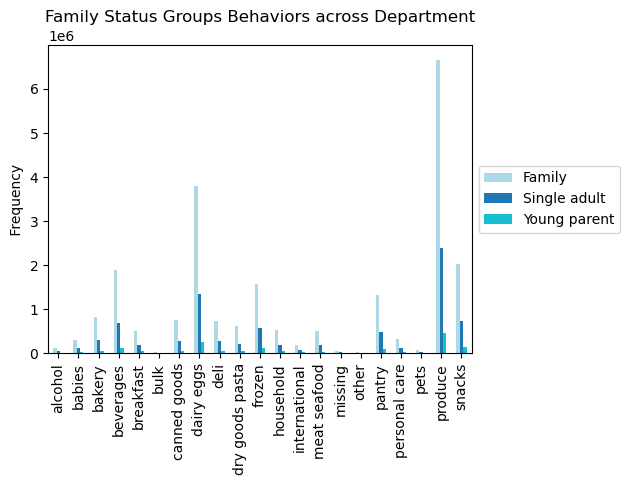

In [82]:
# Create a bar chart of the above crosstab_family_status_department
bar_crosstab_family_status_department=crosstab_family_status_department.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Family Status Groups Behaviors across Department", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()  # Automatically adjust subplot parameters

### Observation: Behavioral patterns among family status groups remain consistent across departments

In [83]:
# Export the chart
bar_crosstab_family_status_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_department.png'))

# Step 9.  Extra Visualization for the Final Project Requirements

## 9.1. Visualisation for the 'price_range' flag (regards to Key Question 3)

(array([0, 1, 2]),
 [Text(0, 0, 'Mid-range product'),
  Text(1, 0, 'Low-range product'),
  Text(2, 0, 'High-range product')])

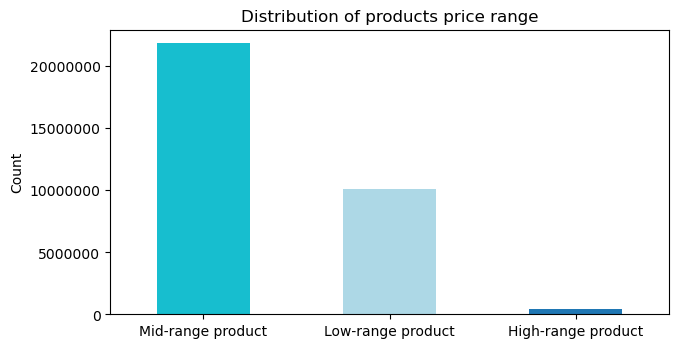

In [84]:
# Create a bar chart of the 'price_range'
bar_price_range_distribution = instacart_all['price_range'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution of products price range",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

### Observation: Most of the products ordered fall into the mid-range category, surpassing the combined total of low-range and high-range products.

In [85]:
# Export the chart
bar_price_range_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

## 9.2. Visualisation for the 'frequency flag' (regards to Key Question 5.1)

(array([0, 1, 2]),
 [Text(0, 0, 'Frequent customer'),
  Text(1, 0, 'Regular customer'),
  Text(2, 0, 'Non-frequent customer')])

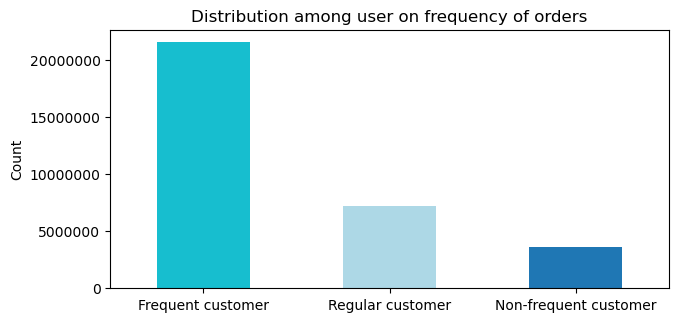

In [86]:
# Create a bar chart of the 'frequency_flag'
bar_frequency_flag = instacart_all['frequency_flag'].value_counts().plot.bar(color=['tab:cyan', 'lightblue','tab:blue'])
plt.ylabel("Count",fontsize=10)
plt.title("Distribution among user on frequency of orders",fontsize=12)
plt.tight_layout()  # Automatically adjust subplot parameters
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels

In [87]:
# Cross-check the result
instacart_all['frequency_flag'].value_counts(dropna=False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: frequency_flag, dtype: int64

### Observation: Most of the orders come from frequent customers, followed by regular customers, and a smaller portion comes from non-frequent customers who return less often:
#### Frequent Customers (68.8%): These are the customers who come back to Instacart within a maximum of 10 days. They make up the majority of orders.
#### Regular Customers (23.0%): These customers return to Instacart within 10 to 20 days for their new orders. They are the second-largest group.
#### Non-frequent Customers (8.2%): These customers take more than 20 days to return to Instacart for another order. They make up the smallest portion of orders.

In [88]:
# Export the chart
bar_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_flag.png'))

## 9.3. Connection between age and family status in terms of ordering habits  (regards to Key Question 5.4)

In [89]:
# Create crosstab of 'family_status and age_group
crosstab_family_status_age_group=pd.crosstab(instacart_all['age_group'],instacart_all['family_status_flag'],dropna=False)

In [90]:
crosstab_family_status_age_group

family_status_flag,Family,Single adult,Young parent
age_group,,,
Middle Age,9469994,3195589,0
Seniors,6455000,2120084,0
Under 40,6831759,2781830,1550603


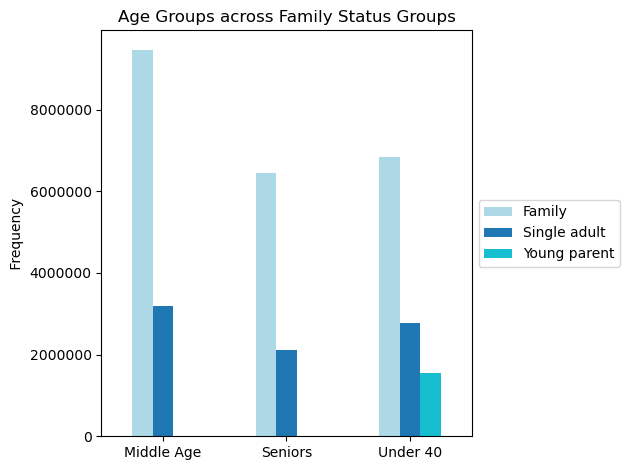

In [93]:
# Create a bar chart of the above crosstab_family_status_age_group
bar_crosstab_family_status_age_group=crosstab_family_status_age_group.plot.bar(color=['lightblue','tab:blue', 'tab:cyan'])
plt.xlabel("", fontsize=10)
plt.ylabel(" Frequency ",fontsize=10)
plt.title("Age Groups across Family Status Groups", fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on the y-axis
plt.xticks(rotation=360) # Rotate x-axis labels
plt.tight_layout()  # Automatically adjust subplot parameters

### Observation: Visualisation illustrates that regardless of a customer's age group, those classified as "family" members tend to make the most orders on Instacart, followed by single adults, with young parents ordering the least. This implies that there isn't a strong correlation between a customer's age and their family status concerning their ordering behavior on Instacart.

In [100]:
# Export the chart
bar_crosstab_family_status_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_family_status_age_group.png'))